# Model Comparison - Yeast Dataset

In [1]:
# Import libraries
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Import project modules
from src.data_loader import load_processed_data
from src.config import *

print("📊 Model Comparison Analysis")
print("=" * 35)

📊 Model Comparison Analysis


In [2]:
# Load data and models
print("1. Loading data and models...")
X_train, X_test, y_train, y_test = load_processed_data()
label_encoder = np.load(MODELS_DIR / 'label_encoder.npy', allow_pickle=True)
class_names = label_encoder

# Load all models
models = {}
model_names = ['decision_tree', 'naive_bayes', 'logistic_regression', 'knn', 'random_forest']

for name in model_names:
    models[name] = joblib.load(MODELS_DIR / f'{name}.pkl')
    print(f"Loaded {name}: {type(models[name])}")

print(f"\nTest data shape: {X_test.shape}")
print(f"Number of classes: {len(class_names)}")

1. Loading data and models...
Loaded decision_tree: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Loaded naive_bayes: <class 'sklearn.naive_bayes.GaussianNB'>
Loaded logistic_regression: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Loaded knn: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Loaded random_forest: <class 'sklearn.ensemble._forest.RandomForestClassifier'>

Test data shape: (446, 8)
Number of classes: 10


In [3]:
# Evaluate all models
print("2. Evaluating all models...")
print("=" * 35)

results = []

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Calculate ROC AUC if possible
    try:
        y_pred_proba = model.predict_proba(X_test)
        if y_pred_proba.shape[1] == len(class_names):
            y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
            roc_auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr', average='weighted')
        else:
            roc_auc = None
    except:
        roc_auc = None
    
    results.append({
        'model': name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    })
    
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    if roc_auc:
        print(f"  ROC-AUC: {roc_auc:.4f}")

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\n" + "="*50)
print("SUMMARY RESULTS")
print("="*50)
print(results_df.round(4))

2. Evaluating all models...

Evaluating decision_tree...
  Accuracy: 0.5605
  Precision: 0.5501
  Recall: 0.5605
  F1-Score: 0.5412
  ROC-AUC: 0.7673

Evaluating naive_bayes...
  Accuracy: 0.1211
  Precision: 0.3649
  Recall: 0.1211
  F1-Score: 0.1343
  ROC-AUC: 0.7320

Evaluating logistic_regression...
  Accuracy: 0.5830
  Precision: 0.5854
  Recall: 0.5830
  F1-Score: 0.5678
  ROC-AUC: 0.8327

Evaluating knn...
  Accuracy: 0.6121
  Precision: 0.6055
  Recall: 0.6121
  F1-Score: 0.6002
  ROC-AUC: 0.8387

Evaluating random_forest...
  Accuracy: 0.6233
  Precision: 0.6112
  Recall: 0.6233
  F1-Score: 0.6116
  ROC-AUC: 0.8535

SUMMARY RESULTS
                 model  accuracy  precision  recall  f1_score  roc_auc
0        decision_tree    0.5605     0.5501  0.5605    0.5412   0.7673
1          naive_bayes    0.1211     0.3649  0.1211    0.1343   0.7320
2  logistic_regression    0.5830     0.5854  0.5830    0.5678   0.8327
3                  knn    0.6121     0.6055  0.6121    0.6002   0.8

/Users/tiagol./Developer/yeast-ml-project/virtual/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/tiagol./Developer/yeast-ml-project/virtual/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/tiagol./Developer/yeast-ml-project/virtual/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/tiagol./Developer/yeast-ml-project/virtual/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but GaussianNB was fitted without feature nam

3. Creating comparison visualizations...


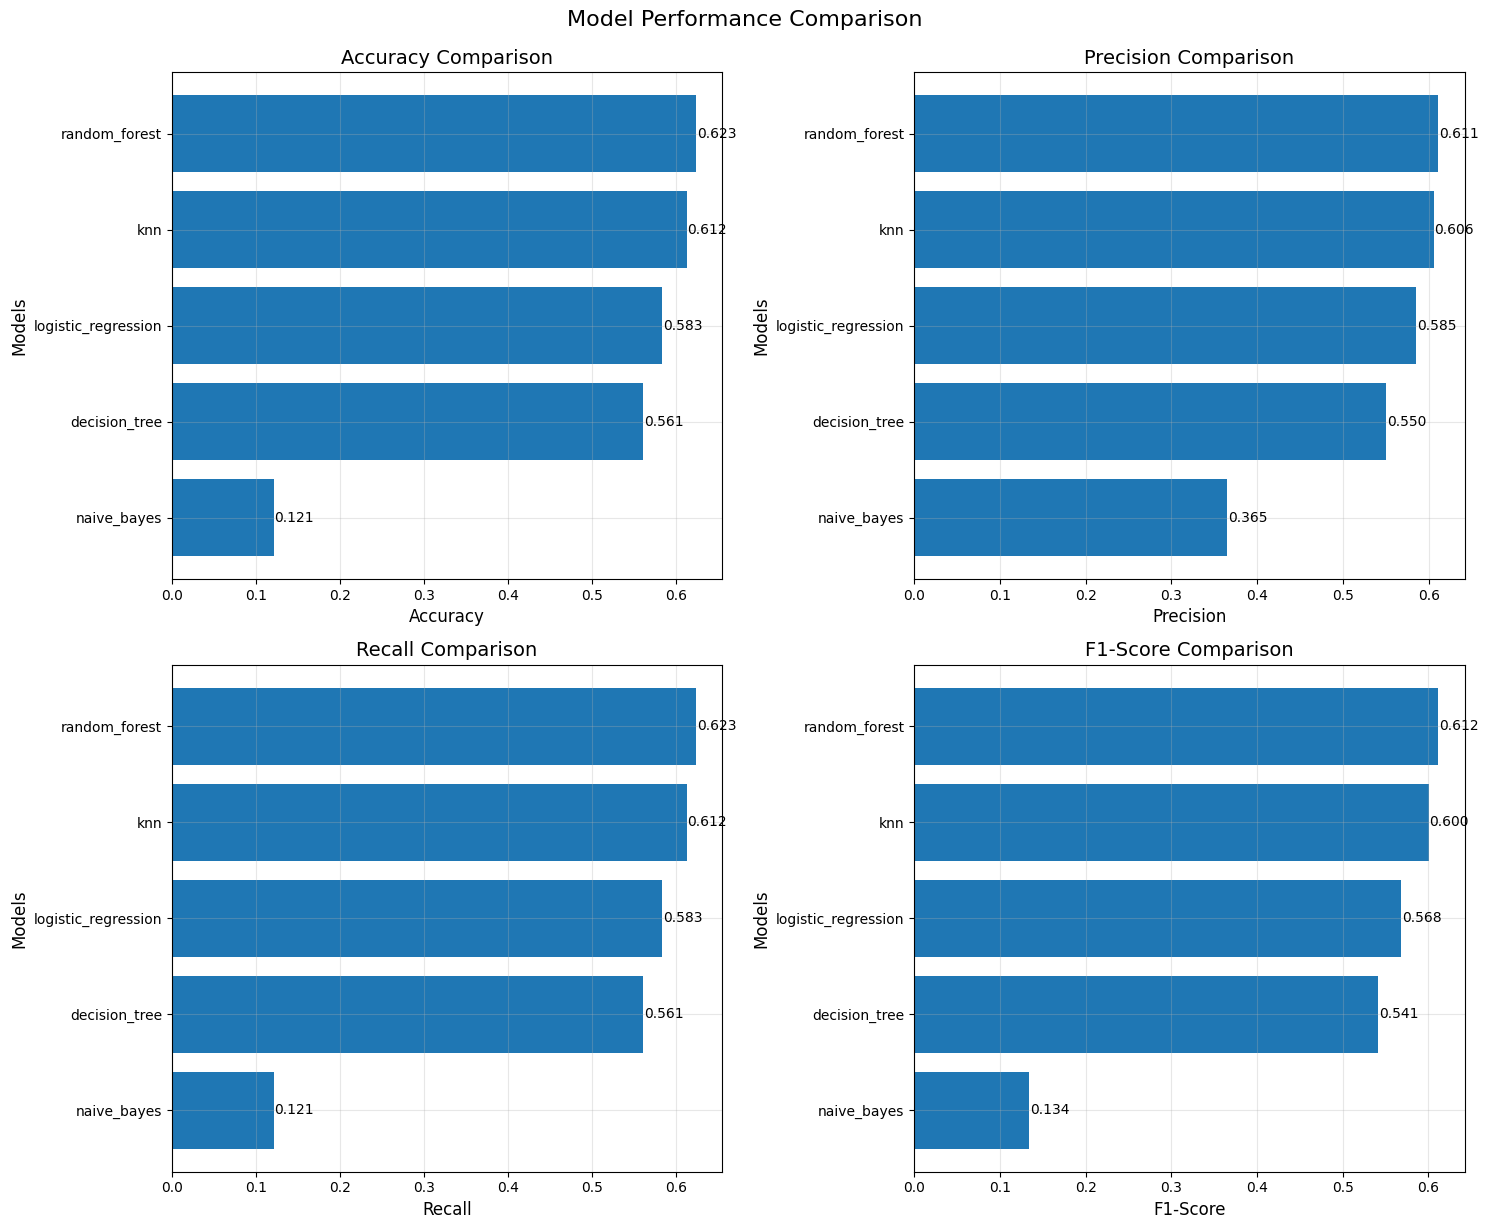

In [4]:
# Model Comparison Visualizations
print("3. Creating comparison visualizations...")
print("=" * 45)

# Create subplots for different metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, (metric, name) in enumerate(zip(metrics, metric_names)):
    ax = axes[i//2, i%2]
    
    # Sort by metric value
    sorted_df = results_df.sort_values(metric, ascending=True)
    
    bars = ax.barh(sorted_df['model'], sorted_df[metric])
    ax.set_title(f'{name} Comparison', fontsize=14)
    ax.set_xlabel(name, fontsize=12)
    ax.set_ylabel('Models', fontsize=12)
    
    # Add value labels on bars
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
               f'{width:.3f}', ha='left', va='center')
    
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Model Performance Comparison', fontsize=16, y=1.02)
plt.show()

In [5]:
# Best Model Analysis
print("4. Best Model Analysis")
print("=" * 25)

# Find best model by accuracy
best_model_name = results_df.loc[results_df['accuracy'].idxmax(), 'model']
best_accuracy = results_df['accuracy'].max()

print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Show ranking
print("\nModel Ranking by Accuracy:")
ranking = results_df.sort_values('accuracy', ascending=False)
for i, (_, row) in enumerate(ranking.iterrows(), 1):
    print(f"{i}. {row['model']}: {row['accuracy']:.4f}")

# Performance summary
print("\nPerformance Summary:")
print(f"Best model: {best_model_name}")
print(f"Worst model: {results_df.loc[results_df['accuracy'].idxmin(), 'model']}")
print(f"Accuracy range: {results_df['accuracy'].min():.4f} - {results_df['accuracy'].max():.4f}")
print(f"Average accuracy: {results_df['accuracy'].mean():.4f}")

4. Best Model Analysis
Best Model: random_forest
Best Accuracy: 0.6233

Model Ranking by Accuracy:
1. random_forest: 0.6233
2. knn: 0.6121
3. logistic_regression: 0.5830
4. decision_tree: 0.5605
5. naive_bayes: 0.1211

Performance Summary:
Best model: random_forest
Worst model: naive_bayes
Accuracy range: 0.1211 - 0.6233
Average accuracy: 0.5000


5. Confusion Matrices Comparison


/Users/tiagol./Developer/yeast-ml-project/virtual/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/tiagol./Developer/yeast-ml-project/virtual/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/Users/tiagol./Developer/yeast-ml-project/virtual/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/tiagol./Developer/yeast-ml-project/virtual/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/tiagol./Developer/yeast-ml-project/virtual/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarni

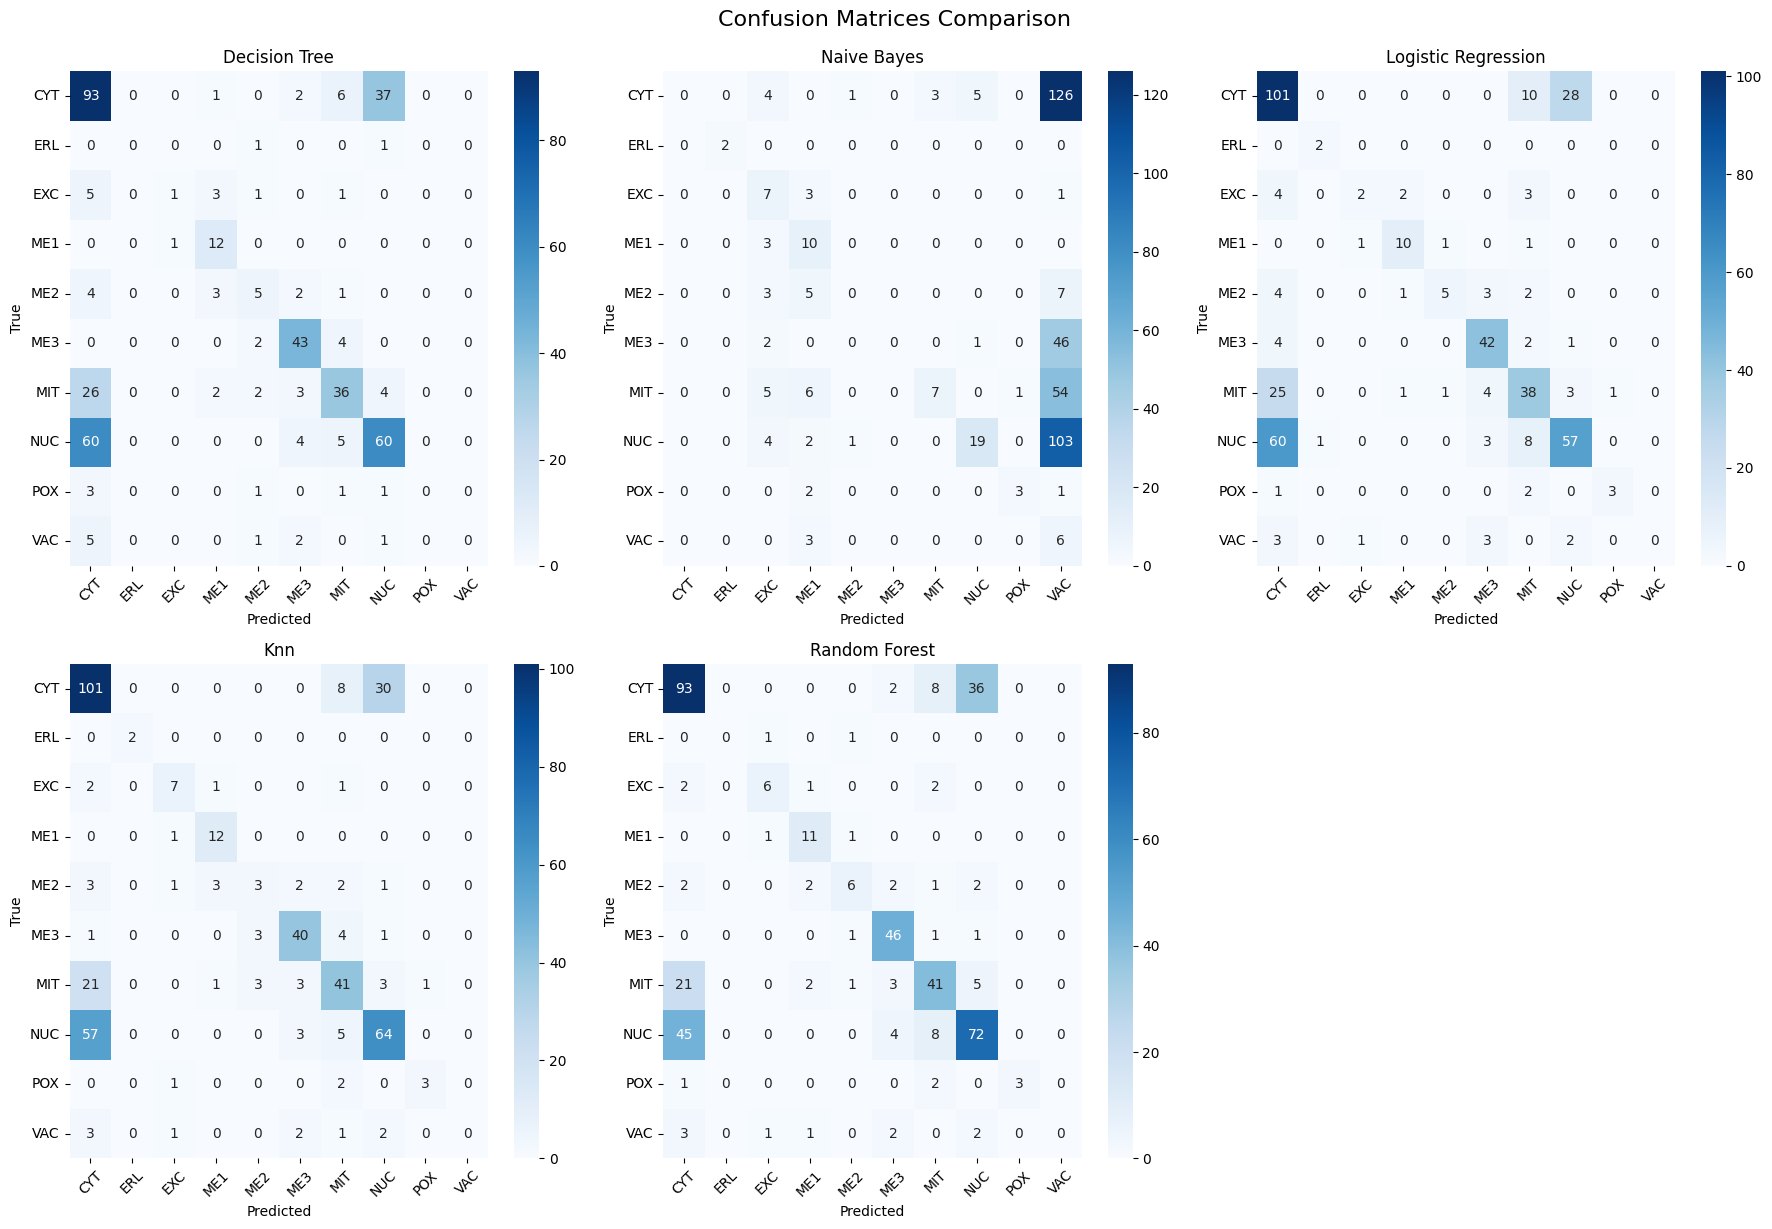

In [6]:
# Confusion Matrices Comparison
print("5. Confusion Matrices Comparison")
print("=" * 40)

from sklearn.metrics import confusion_matrix

# Create confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                ax=axes[i])
    axes[i].set_title(f'{name.replace("_", " ").title()}', fontsize=12)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', rotation=0)

# Hide the last subplot if we have 5 models
if len(models) < 6:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.suptitle('Confusion Matrices Comparison', fontsize=16, y=1.02)
plt.show()